# Network Analysis

**More about different graph generators**
> [NetworkX Graph generators](https://networkx.org/documentation/stable/reference/generators.html)

To install the package, please run the below command in a Jupyter notebook and once the command runs successfully, restart the kernel:

In [1]:
# !pip install networkx

To import the package, run the following command in a Jupyter notebook:

In [2]:
import networkx as nx

#### 1. nx.Graph() to create a graph:

A graph is defined as a collection of nodes (vertices) and identified pairs of nodes (called edges, links, etc.). Nodes in NetworkX can be any hashable object, such as text, string, an image, an XML object, another Graph, a customized node object, and so on.

To create an empty graph, we need to call the Graph() class as shown below.

In [3]:
G = nx.Graph()
G

#### 2. nx.from_pandas_edgelist(): 

From the above function, we can get a Pandas dataframe containing an edge list.

The parameters used by the function are as shown below:

In [4]:
# from_pandas_edgelist(df, 
#                      source='source', 
#                      target='target', 
#                      edge_attr=None, 
#                      create_using=None, 
#                      edge_key=None)

- **df**: Pandas data frame. A graph's edge list representation.
- **Source**: str or int. For the source nodes, a valid column name (string or integer) (for the directed case).
- **target**: str or int. For the target nodes, a valid column name (string or integer) (for the directed case).
- **edge_attr**: str or int, iterable, True, or None. A valid column name (str or int) or iterable column name is used to retrieve items and add them as edge attributes to the graph. If true, the rest of the columns will be added. If none is specified, no edge attributes are added to the graph.
- **Create_using**: NetworkX graph constructor, optional (default=nx.Graph). To create a graph type. If this is a graph instance, it must be cleared before being populated.
- **edge_key** : str or None, optional (default=None) A valid column name for the edge keys (for a MultiGraph). If create using is a multigraph, the values in this column are used as edge keys when adding edges.

Below we see an implementation of this function in the case study titled Game of Thrones Network Analysis: 

In [5]:
# # nx.from_pandas_edgelist returns a graph from a Pandas DataFrame containing an edge list.
# G1 = nx.from_pandas_edgelist(book1, 'Person 1', 'Person 2', 
#                              edge_attr='weight', create_using=nx.Graph())
# G2 = nx.from_pandas_edgelist(book2, 'Person 1', 'Person 2', 
#                              edge_attr='weight', create_using=nx.Graph())

The following is a helpful article from AskPython.org that gives an in-depth introduction to NetworkX:

[NetworkX Package - Python Graph Library](https://www.askpython.com/python-modules/networkx-package)

# Tutorial
- [Tutorial](https://networkx.org/documentation/stable/tutorial.html)
- [NetworkX Package – Python Graph Library](https://www.askpython.com/python-modules/networkx-package)

### Creating a graph

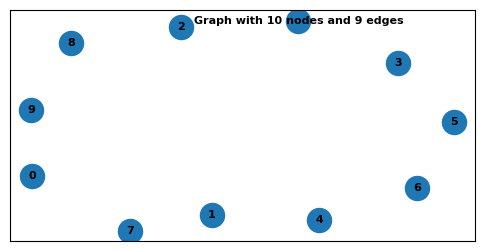

In [6]:
# Creating a graph
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

# Nodes
# Graph generator functions: https://networkx.org/documentation/stable/reference/generators.html

# You can add one node at a time
G.add_node(1)

# add nodes from any iterable container, such as a list
G.add_nodes_from([2, 3])

# add nodes along with node attributes if your container yields 2-tuples 
# of the form (node, node_attribute_dict)
# Nodes attributes: https://networkx.org/documentation/stable/tutorial.html#attributes
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])


# Nodes from one graph can be incorporated into another:
H = nx.path_graph(10)
G.add_nodes_from(H)

# In contrast, you could use the graph H as a node in G.
G.add_node(H)

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', font_size=8)

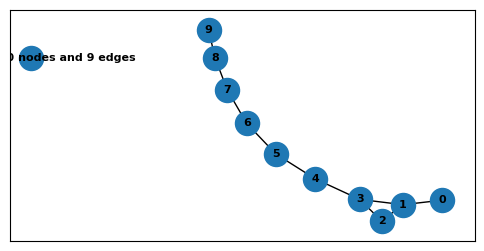

In [7]:
# G can also be grown by adding one edge at a time,
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

# adding a list of edges,
G.add_edges_from([(1, 2), (1, 3)])

# by adding any ebunch of edges
G.add_edges_from(H.edges)

# Edge attributes: https://networkx.org/documentation/stable/tutorial.html#attributes
G.add_edges_from(H.edges)

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', font_size=8)

### Removing all nodes and edges


Number of nodes: 8
Number of edges: 3



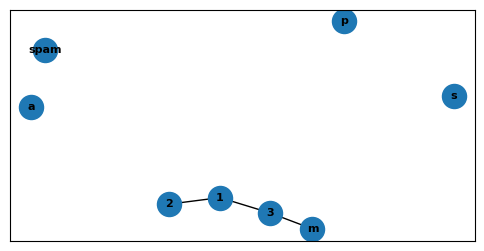

In [8]:
# removing all nodes and edges
G.clear()

# creating a new graph
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

# At this stage the graph G consists of 8 nodes and 3 edges, as can be seen by:
print(f"""
Number of nodes: {G.number_of_nodes()}
Number of edges: {G.number_of_edges()}
""")

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', font_size=8)

### Examining elements of a graph

In [9]:
# Examining elements of a graph
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [10]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [11]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [12]:
G.degree[1]  # the number of edges incident to 1

2

In [13]:
# report the edges and degree from a subset of all nodes
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [14]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

### Removing elements from a graph

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes), list(G.edges)

([1, 3, 'spam'], [(1, 3)])

In [16]:
G.remove_edge(1, 3)
list(G.nodes), list(G.edges)

([1, 3, 'spam'], [])

### Order of G.edges

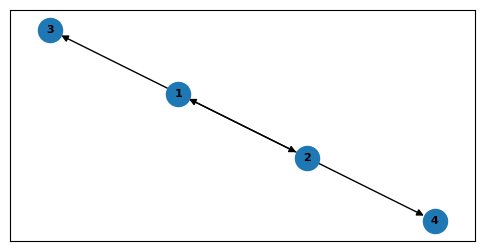

In [17]:
# the order of G.edges is the order of the adjacencies which includes 
# both the order of the nodes and each node’s adjacencies
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(DG, with_labels=True, font_weight='bold', font_size=8)

### Using the graph constructors

In [18]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
print('Edges (DiGraph  ): ', list(H.edges()))

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
print('Edges (from List): ', list(H.edges()))

adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
print('Edges (from dict): ', list(H.edges()))

Edges (DiGraph  ):  [(1, 2), (2, 1)]
Edges (from List):  [(0, 1), (1, 2), (2, 3)]
Edges (from dict):  [(0, 1), (0, 2), (1, 2)]


### Accessing edges and neighbors

In [19]:
# access to edges and neighbors is possible using subscript notation
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]
print(G[1][2])

{2: {'color': 'yellow'}}
{'color': 'yellow'}


In [20]:
# You can get/set the attributes of an edge using subscript notation if the edge already exists
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [21]:
# Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items()
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [22]:
# Convenient access to all edges is achieved with the edges property
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


### Adding attributes to graphs, nodes, and edges

In [23]:
# Graph attributes
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [24]:
# modify attributes later
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [25]:
# Node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [26]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [27]:
# Edge Attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

### Accessing elements of graph

In [28]:
G = nx.Graph() 
G.add_edges_from([(1,2), (1,3), (3,4), (3,5)])

print(f"""
Nodes: {G.nodes} 
Edges: {G.edges}
Adjacency List: {G.adj}
Degree: {G.degree}

Adjacency List for node 3: {G.adj[3]}
Degree for node 3: {G.degree[3]}
""")


Nodes: [1, 2, 3, 4, 5] 
Edges: [(1, 2), (1, 3), (3, 4), (3, 5)]
Adjacency List: {1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 4: {}, 5: {}}, 4: {3: {}}, 5: {3: {}}}
Degree: [(1, 2), (2, 1), (3, 3), (4, 1), (5, 1)]

Adjacency List for node 3: {1: {}, 4: {}, 5: {}}
Degree for node 3: 3



### Directed graphs

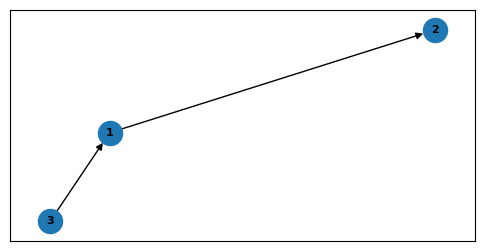

In [29]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(DG, with_labels=True, font_weight='bold', font_size=8)

In [30]:
DG.out_degree(1, weight='weight')

0.5

In [31]:
DG.degree(1, weight='weight')

1.25

In [32]:
list(DG.successors(1))

[2]

In [33]:
list(DG.neighbors(1))

[2]

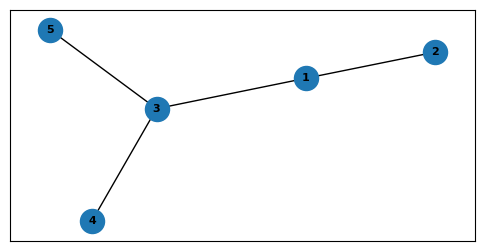

In [34]:
# Some algorithms work only for directed graphs and others are not well 
# defined for directed graphs. Indeed the tendency to lump directed and 
# undirected graphs together is dangerous. If you want to treat a directed 
# graph as undirected for some measurement you should probably convert it 
# using Graph.to_undirected() or with
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(H, with_labels=True, font_weight='bold', font_size=8)

### Multigraphs

NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

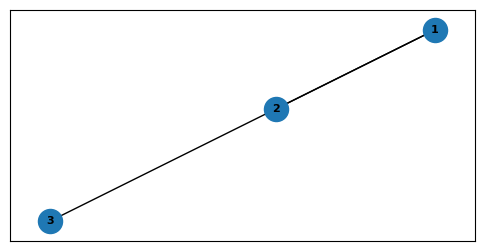

In [35]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(MG, with_labels=True, font_weight='bold', font_size=8)

In [36]:
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [37]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### Using a (constructive) generator for a classic graph

In [38]:
K_5 = nx.complete_graph(5)                 # Return the complete graph K_n with n nodes.
K_3_5 = nx.complete_bipartite_graph(3, 5)  # Returns the complete bipartite graph K_{n_1,n_2}.
barbell = nx.barbell_graph(10, 10)         # Returns the Barbell Graph: 
                                           # two complete graphs connected by a path.
lollipop = nx.lollipop_graph(10, 20)       # Returns the Lollipop Graph; K_m connected to P_n.

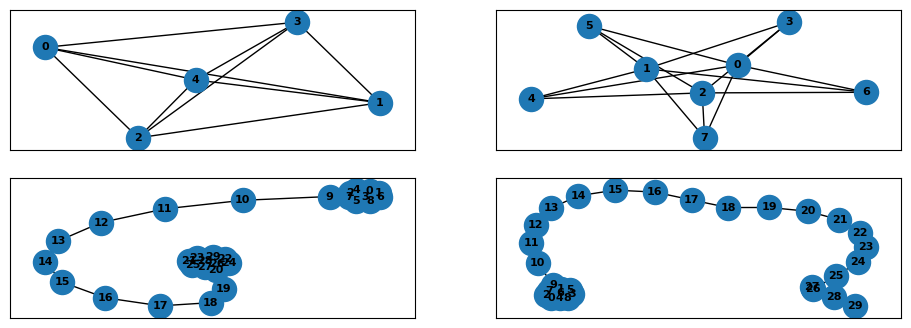

In [39]:
# plot the graph
fig, axis = plt.subplots(2, 2, figsize=(11.5, 4))
axis = axis.ravel()

for i, g in enumerate([K_5, K_3_5, barbell, lollipop]):
    nx.draw_networkx(g, with_labels=True, font_weight='bold', font_size=8, ax=axis[i])
plt.show()

### Using a stochastic graph generator

In [40]:
er = nx.erdos_renyi_graph(30, 0.15)      # Returns a random graph, also known as an 
                                          # Erdős-Rényi graph or a binomial graph.
ws = nx.watts_strogatz_graph(30, 3, 0.1)  # Returns a Watts–Strogatz small-world graph.
ba = nx.barabasi_albert_graph(30, 5)     # Returns a random graph using Barabási–Albert 
                                          # preferential attachment
red = nx.random_lobster(30, 0.9, 0.9)    # Returns a random lobster graph.

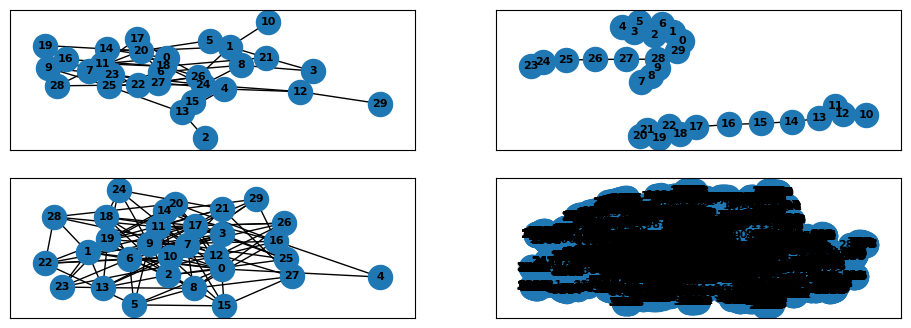

In [41]:
# plot the graph
fig, axis = plt.subplots(2, 2, figsize=(11.5, 4))
axis = axis.ravel()

for i, g in enumerate([er, ws, ba, red]):
    nx.draw_networkx(g, with_labels=True, font_weight='bold', font_size=8, ax=axis[i])
plt.show()

### Reading a graph stored in a file using common graph formats

In [42]:
nx.write_gml(red, "data/g_test.gml")
mygraph = nx.read_gml("data/g_test.gml")
mygraph

### Analyzing graphs

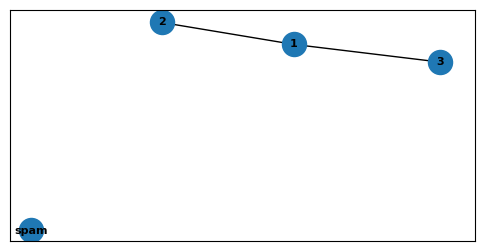

In [43]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"

# plot the graph
plt.figure(figsize=(6,3)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', font_size=8)

In [44]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [45]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [46]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [47]:
# Some functions with large output iterate over (node, value) 2-tuples. 
# These are easily stored in a dict structure if you desire.
sp = dict(nx.all_pairs_shortest_path(G))
sp

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

### Drawing graphs

In [48]:
G = nx.petersen_graph()
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

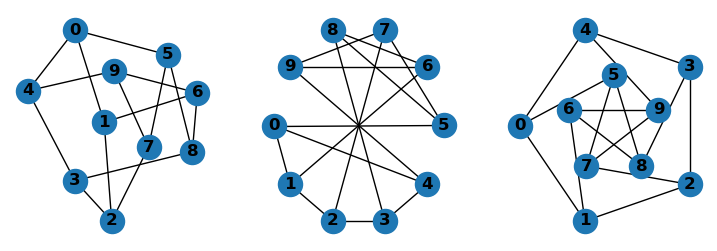

In [49]:
plt.figure(figsize=(9,3)) 

subax1 = plt.subplot(131)
nx.draw_networkx(G, with_labels=True, font_weight='bold',
                 ax=subax1)
plt.axis('off')

subax2 = plt.subplot(132)
nx.draw_shell(G, nlist=[range(5, 10), range(10)], with_labels=True, font_weight='bold',
              ax=subax2)

subax2 = plt.subplot(133)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',
              ax=subax2)

plt.show()

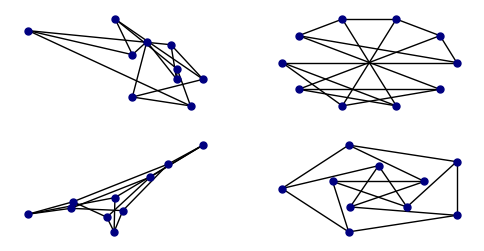

In [50]:
# command if you are not using matplotlib in interactive mode.
options = {
    'node_color': 'navy',
    'node_size': 25,
    'width': 1,
}

plt.figure(figsize=(6,3)) 

subax1 = plt.subplot(221)
nx.draw_random(G, ax=subax1, **options)

subax2 = plt.subplot(222)
nx.draw_circular(G, ax=subax2, **options)

subax3 = plt.subplot(223)
nx.draw_spectral(G, ax=subax3, **options)

subax4 = plt.subplot(224)
nx.draw_shell(G, ax=subax4, nlist=[range(5,10), range(5)], **options)

plt.show()

In [51]:
# You can find additional options via draw_networkx() and layouts 
# via the layout module. You can use multiple shells with draw_shell().
G = nx.dodecahedral_graph()
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

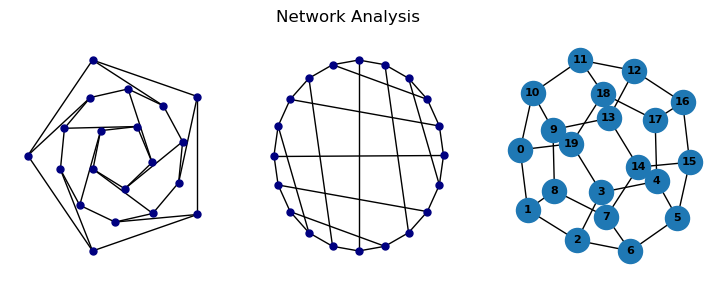

In [52]:
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]

plt.figure(figsize=(9,3)) 
ax = plt.subplot(131)
nx.draw_shell(G, nlist=shells, ax=ax, **options)

ax = plt.subplot(132)
nx.draw_shell(G, ax=ax, **options)

ax = plt.subplot(133)
nx.draw_networkx(G, with_labels=True, ax=ax, font_weight='bold', font_size=8)
plt.axis('off')
plt.suptitle('Network Analysis')
plt.savefig("data/network_graph_example.png")
plt.show()

### Visualizing NetworkX Package Graphs

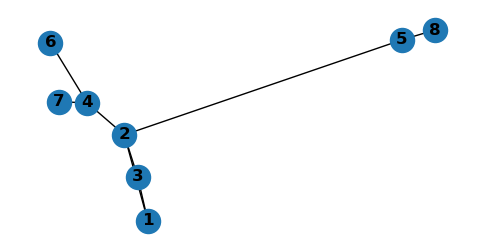

In [53]:
G = nx.Graph()
 
# Using add_edge
G.add_edge(1, 2, weight = 12.5)
G.add_edge(3, 2, weight = 50.0)
G.add_edge(1, 3, weight = 17)
G.add_edge(4, 2, weight = 100)
G.add_edge(2, 5, weight = 1)
G.add_edge(4, 6, weight = 25.5)
G.add_edge(7, 4, weight = 175)
G.add_edge(5, 8, weight = 90)

plt.figure(figsize=(6,3)) 
ax = plt.subplot(111)
nx.draw(G, with_labels= True, font_weight='bold', ax=ax)
plt.show()

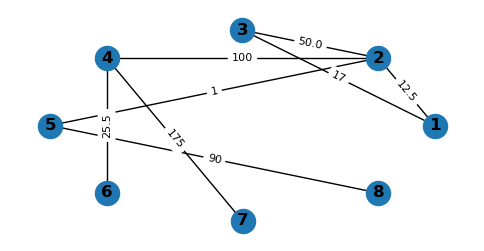

In [54]:
# If you want to draw graphs with weights use draw_networkx_edge_labels() along 
# with nx.draw() specifying the graph, pos and edge_label attributes
import networkx as nx
import matplotlib.pyplot as plt
 
G = nx.Graph()
 
# Using add_edge
G.add_edge(1, 2, weight = 12.5)
G.add_edge(3, 2, weight = 50.0)
G.add_edge(1, 3, weight = 17)
G.add_edge(4, 2, weight = 100)
G.add_edge(2, 5, weight = 1)
G.add_edge(4, 6, weight = 25.5)
G.add_edge(7, 4, weight = 175)
G.add_edge(5, 8, weight = 90)
 
plt.figure(figsize=(6,3)) 
ax = plt.subplot(111)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', ax=ax)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight, font_size=8)
plt.show()

### Directed Graphs

Out edges of node 4 are: [(4, 5), (4, 6)]
In Degree of node 2 is: 2
Successors of node 4 are: [5, 6]
Predecessors of node 2 are: [1, 5]


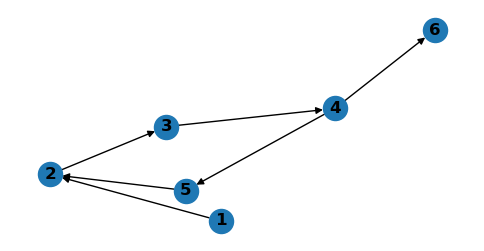

In [55]:
DG = nx.DiGraph()
 
DG.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,2), (4, 6)])
 
# Print edges going out from node 4
print("Out edges of node 4 are:",DG.out_edges(4))
 
# Print in degree of node 2
print("In Degree of node 2 is:",DG.in_degree(2))
 
# Print successors of node 4
print("Successors of node 4 are:",list(DG.successors(4)))
 
# Print predecessors of node 2
print("Predecessors of node 2 are:",list(DG.predecessors(2)))

plt.figure(figsize=(6,3)) 
ax = plt.subplot(111)
nx.draw(DG, with_labels= True, font_weight='bold', ax=ax)
plt.show()

In [56]:
# output of spring layout
nx.spring_layout(DG)

{1: array([0.28533457, 0.43563884]),
 2: array([0.28502945, 0.04424619]),
 3: array([-0.00292645, -0.25736623]),
 4: array([-0.2106717 , -0.04987775]),
 5: array([0.64323412, 0.29826367]),
 6: array([-1.        , -0.47090471])}

**Notes:**
    
- You can draw the graph using two drawing methods: **draw()** and **draw_networkx()**. With draw() you can draw a simple graph with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default, while draw_networkx() allows you to define more options and customize your graph.
- **draw_shell** --> Draw networkx graph G with shell layout. Position nodes in concentric circles.
- **draw_spring** --> Draw the graph G with a spring layout. Position nodes using Fruchterman-Reingold force-directed algorithm. The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.
- **draw_kamada_kawai** --> Draw the graph with the Kamada-Kawai layaout. This layout is based on path-length with low cost-function

### Computing measures

In [57]:
# High degree centrality: most popular subject
# nx.degree_centrality(G) computes the degree centrality for nodes.
# The degree centrality for a node v is the fraction of nodes it is connected to.
degree_centrality      = nx.degree_centrality(DG) 
print('degree_centrality:', 
      sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True), sep='\n')

# High closeness centrality: subject that could best inform the group
# nx.eigenvector_centrality computes the eigenvector centrality for the graph G.
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 
closeness_centrality   = nx.closeness_centrality(DG)
print('closeness_centrality:', 
      sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True), sep='\n')

# High betweenness centrality: subject whose removal could best break the network apart
# nx.betweenness_centrality(G) computes the shortest-path betweenness centrality for nodes.
# Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that 
# pass through v. 
betweenness_centrality = nx.betweenness_centrality(DG)
print('betweenness_centrality:', 
      sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True), sep='\n')

# High eigenvector centrality: most popular subject that is near with popular subjects
eigenvector_centrality = nx.eigenvector_centrality_numpy(DG)
print('eigenvector_centrality:', 
      sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True), sep='\n')

degree_centrality:
[(2, 0.6000000000000001), (4, 0.6000000000000001), (3, 0.4), (5, 0.4), (1, 0.2), (6, 0.2)]
closeness_centrality:
[(2, 0.45714285714285713), (3, 0.4), (6, 0.35714285714285715), (4, 0.35555555555555557), (5, 0.32000000000000006), (1, 0.0)]
betweenness_centrality:
[(2, 0.4), (3, 0.4), (4, 0.4), (5, 0.15000000000000002), (1, 0.0), (6, 0.0)]
eigenvector_centrality:
[(4, 0.4472135954999583), (6, 0.44721359549995815), (5, 0.447213595499958), (3, 0.4472135954999579), (2, 0.44721359549995704), (1, -2.302919964214111e-16)]


In [58]:
# Returns the average shortest path length.
average_shortest_path_length = nx.average_shortest_path_length(DG)
print('average_shortest_path_length:', average_shortest_path_length)

# The average degree connectivity is the average nearest neighbor degree of nodes with degree k
average_degree_connectivity = nx.average_degree_connectivity(DG)
print('average_degree_connectivity:',
      sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True), sep='\n')

average_shortest_path_length: 1.6
average_degree_connectivity:
[(4, 0.4472135954999583), (6, 0.44721359549995815), (5, 0.447213595499958), (3, 0.4472135954999579), (2, 0.44721359549995704), (1, -2.302919964214111e-16)]


------------------------